In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import seaborn as sns
import numpy as np

In [63]:
# 감정 라벨 개수 세기
with open("/content/drive/MyDrive/2023 국립국어원/nikluge-2023-ea-train.jsonl", "r") as file:
    lines = file.readlines()

emotion_counts = {
    "joy": 0,
    "anticipation": 0,
    "trust": 0,
    "surprise": 0,
    "disgust": 0,
    "fear": 0,
    "anger": 0,
    "sadness": 0
}

multi_label_emotion_combinations = defaultdict(int)

total_emotions = 0
multi_label_emotions_count = 0

for line in lines:
    data = json.loads(line)

    true_count = sum(1 for value in data["output"].values() if value == "True")
    true_emotions = [emotion for emotion, value in data["output"].items() if value == "True"]

    if true_count > 1:
        multi_label_emotions_count += (true_count - 1)
        multi_label_emotion_combinations["&".join(true_emotions)] += 1

    for emotion, value in data["output"].items():
        if value == "True":
            emotion_counts[emotion] += 1
            total_emotions += 1

print(emotion_counts)
print(f"Total emotions: {total_emotions}")
# 중복 감정 총 개수
print(f"duplicated_label emotions count: {multi_label_emotions_count}")
# multi label 종류
print("multi_label emotion counts by type:", dict(multi_label_emotion_combinations))
print("multi_label emotion counts", sum(dict(multi_label_emotion_combinations).values()))

{'joy': 21781, 'anticipation': 9385, 'trust': 2226, 'surprise': 2657, 'disgust': 1553, 'fear': 849, 'anger': 1686, 'sadness': 2522}
Total emotions: 42659
duplicated_label emotions count: 3971
multi_label emotion counts by type: {'joy&trust': 1711, 'joy&anticipation': 753, 'joy&surprise': 150, 'disgust&anger': 289, 'anticipation&fear': 78, 'anticipation&sadness': 140, 'joy&anger': 30, 'joy&fear': 41, 'joy&anticipation&trust': 90, 'surprise&sadness': 30, 'disgust&fear': 24, 'anticipation&anger': 15, 'anticipation&surprise': 23, 'disgust&sadness': 22, 'joy&sadness': 133, 'anger&sadness': 32, 'joy&trust&anger': 1, 'surprise&disgust': 25, 'joy&trust&sadness': 11, 'anticipation&trust': 16, 'fear&anger': 9, 'joy&disgust': 44, 'fear&sadness': 27, 'joy&surprise&sadness': 1, 'trust&sadness': 3, 'anticipation&surprise&sadness': 1, 'trust&fear': 3, 'joy&trust&surprise': 9, 'joy&trust&fear': 8, 'surprise&anger': 30, 'anticipation&disgust': 18, 'trust&surprise': 15, 'joy&anticipation&disgust': 2, 'j

In [64]:
# 2감정, 3감정 분류
two_emotion_labels = {}
three_emotion_labels = {}

for key, value in dict(multi_label_emotion_combinations).items():
    emotion_count = key.count('&')
    if emotion_count == 1:
        two_emotion_labels[key] = value
    elif emotion_count == 2:
        three_emotion_labels[key] = value

print(two_emotion_labels)
print(three_emotion_labels)



{'joy&trust': 1711, 'joy&anticipation': 753, 'joy&surprise': 150, 'disgust&anger': 289, 'anticipation&fear': 78, 'anticipation&sadness': 140, 'joy&anger': 30, 'joy&fear': 41, 'surprise&sadness': 30, 'disgust&fear': 24, 'anticipation&anger': 15, 'anticipation&surprise': 23, 'disgust&sadness': 22, 'joy&sadness': 133, 'anger&sadness': 32, 'surprise&disgust': 25, 'anticipation&trust': 16, 'fear&anger': 9, 'joy&disgust': 44, 'fear&sadness': 27, 'trust&sadness': 3, 'trust&fear': 3, 'surprise&anger': 30, 'anticipation&disgust': 18, 'trust&surprise': 15, 'trust&disgust': 2, 'surprise&fear': 10, 'trust&anger': 1}
{'joy&anticipation&trust': 90, 'joy&trust&anger': 1, 'joy&trust&sadness': 11, 'joy&surprise&sadness': 1, 'anticipation&surprise&sadness': 1, 'joy&trust&surprise': 9, 'joy&trust&fear': 8, 'joy&anticipation&disgust': 2, 'joy&anger&sadness': 2, 'disgust&fear&sadness': 1, 'joy&fear&sadness': 4, 'joy&disgust&fear': 1, 'joy&surprise&fear': 1, 'joy&anticipation&sadness': 4, 'anticipation&trus

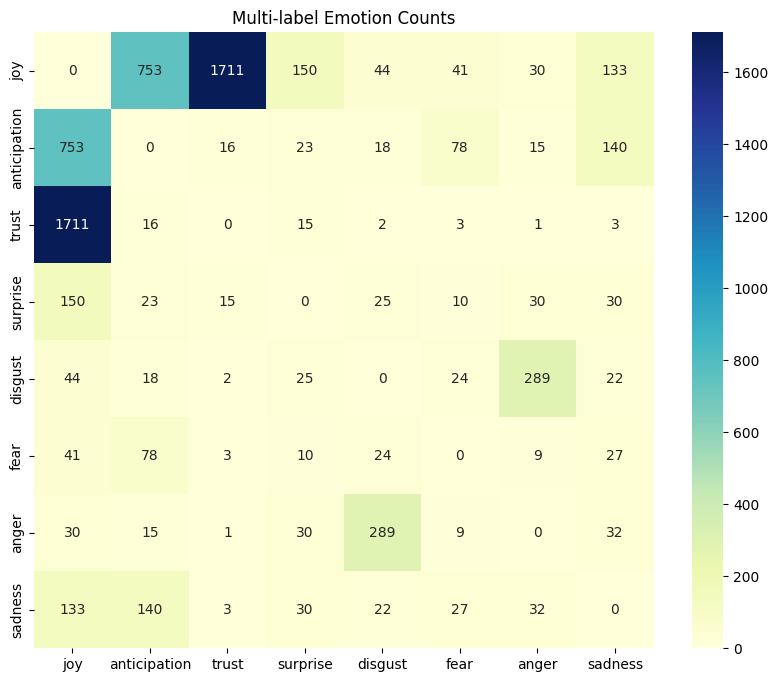

In [68]:
# 2감정 heatmap
all_emotions = ["joy", "anticipation", "trust", "surprise", "disgust", "fear", "anger", "sadness"]

matrix = np.zeros((len(all_emotions), len(all_emotions)))

for combo, count in two_emotion_labels.items():
    emotions = combo.split("&")
    for e1 in emotions:
        for e2 in emotions:
            if e1 != e2:
                matrix[all_emotions.index(e1)][all_emotions.index(e2)] += count

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap="YlGnBu", xticklabels=all_emotions, yticklabels=all_emotions, fmt="g")
plt.title("Multi-label Emotion Counts")
plt.show()

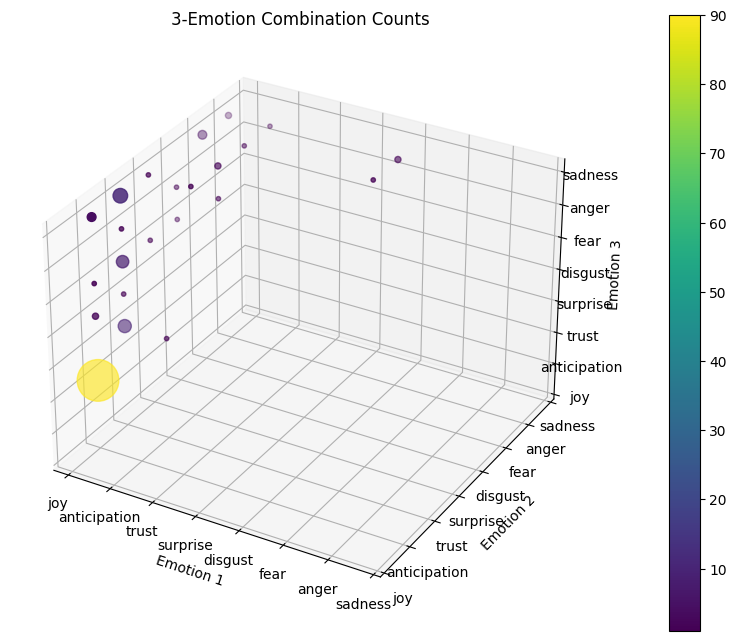

In [69]:
# 3감정...머시기 그래프(쓸데없다)
x, y, z, s = [], [], [], []

for combo, count in three_emotion_labels.items():
    e1, e2, e3 = combo.split('&')
    x.append(all_emotions.index(e1))
    y.append(all_emotions.index(e2))
    z.append(all_emotions.index(e3))
    s.append(count)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=s, s=np.array(s) * 10, cmap='viridis')


cbar = fig.colorbar(scatter, ax=ax, pad=0.1)

ax.set_xticks(range(len(all_emotions)))
ax.set_yticks(range(len(all_emotions)))
ax.set_zticks(range(len(all_emotions)))
ax.set_xticklabels(all_emotions)
ax.set_yticklabels(all_emotions)
ax.set_zticklabels(all_emotions)
ax.set_xlabel('Emotion 1')
ax.set_ylabel('Emotion 2')
ax.set_zlabel('Emotion 3')
ax.set_title("3-Emotion Combination Counts")

plt.show()